In [1]:
using Pkg
Pkg.activate(".")


using Meshing
using Test
using GeometryTypes
import GeometryBasics
const GB = GeometryBasics
using ForwardDiff
using StaticArrays
using Statistics: mean
using LinearAlgebra: dot, norm
using PlotlyJS

  Activating project at `~/Library/CloudStorage/Dropbox/My/Articles/ImplicitTriang/JuliaImp`


In [2]:
# Create a mesh of a sphere using Meshing.jl

a1 = MarchingTetrahedra()


f = (x,y,z) -> (sqrt(x^2 + y^2) - 1.5)^2 + z^2 - 1
mesh = SimpleMesh(HyperRectangle(Vec(-3,-3,-3.),Vec(6,6,6.)), a1, samples=(30,30,30)) do v
    f(v[1],v[2],v[3])
end



function plot_mesh(mesh)
    vs = mesh.vertices
    fs = mesh.faces
    x = [v[1] for v in vs]
    y = [v[2] for v in vs]
    z = [v[3] for v in vs]
    i = [f[1] for f in fs]
    j = [f[2] for f in fs]
    k = [f[3] for f in fs]
    # create plotly mesh 
    mesh = scatter3d(
        x=x, y=y, z=z,
        mode= "markers",
        marker=attr(size=1),
        name="surface",
        showscale=true
    )
    return mesh
end

plot_mesh (generic function with 1 method)

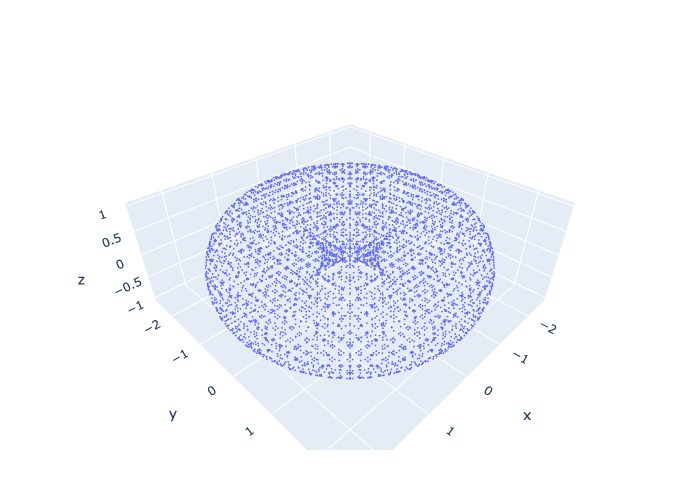

In [3]:

sc = plot_mesh(mesh)

trace = GenericTrace[]
push!(trace, sc)
layout = Layout(width=800, height=800, scene=attr(aspectmode="data"))
plot(trace, layout)

In [ ]:
size(mesh.vertices)

In [ ]:
sample

In [ ]:
mesh.vertices